<h2><font color="#004D7F" size=6>Módulo 4. Machine Learning</font></h2>

<h1><font color="#004D7F" size=5>1. Algoritmo KNN </font></h1>

<h1><font color="#004D7F" size=5>2. Taller de  Creditos Bancarios </font></h1>
<br>
<div style="text-align: right">
<font color="#004D7F" size=3>Luisa López Vázquez</font><br>
<font color="#004D7F" size=3>Diplomado en Ciencia de Datos</font><br>

In [1]:
#Importamos las librerias requeridas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#Leemos el archivo de creditos
clientes = pd.read_csv("creditos.csv")
clientes

,edad,credito,cumplio
0,18,363112,0
1,19,477965,1
2,20,239072,0
3,22,195265,0
4,22,482174,0
...,...,...,...
195,55,100000,0
196,55,523144,0
197,55,543771,0
198,56,285288,0


<BR><BR>

# Pagadores VS Deudores

In [3]:
pagadores=clientes[clientes["cumplio"]==1]
deudores=clientes[clientes["cumplio"]==0]

In [4]:
pagadores

,edad,credito,cumplio
1,19,477965,1
6,23,583565,1
7,24,100000,1
8,24,199272,1
13,25,195341,1
...,...,...,...
187,51,354045,1
188,51,379188,1
189,51,396544,1
190,52,100000,1


In [5]:
deudores

,edad,credito,cumplio
0,18,363112,0
2,20,239072,0
3,22,195265,0
4,22,482174,0
5,23,468815,0
9,24,246195,0
10,24,433444,0
11,25,100000,0
12,25,161474,0
40,28,432323,0


<BR><BR>

# Gráfica: Pagadores VS Deudores

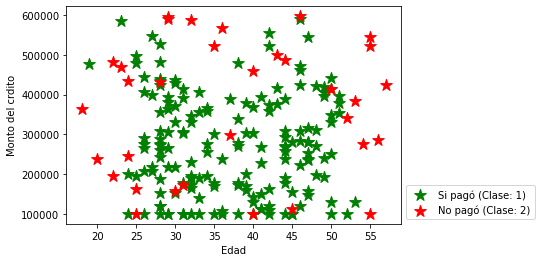

In [6]:
plt.scatter(pagadores["edad"],pagadores["credito"],
           marker="*", s=150, color="green",
           label="Si pagó (Clase: 1)")

plt.scatter(deudores["edad"],deudores["credito"],
           marker="*", s=150, color="red",
           label="No pagó (Clase: 2)")

plt.ylabel("Monto del crdito")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1,0.2))
plt.show()

<BR><BR>

# Preparación de los datos (Escalar)

In [7]:
datos = clientes[["edad", "credito"]]
clase = clientes["cumplio"]

escalador = preprocessing.MinMaxScaler() #Los numero mas pequeños los hace 0 y los mas grandes los hace 1

datos = escalador.fit_transform(datos) #Para que el rango e entre 0 y 1
#datos

In [8]:
#datos

<BR><BR>

# Creación del Modelo KNN
## Valor de K

In [9]:
#una forma de obtner el numero de k vecino es sacando la raiz cuadrada de numero de registros
clasificador = KNeighborsClassifier(n_neighbors=3)
#El fit permite crear nuestro modelo de clasificación
clasificador.fit(datos,clase)

KNeighborsClassifier(n_neighbors=3)

KNeighborsClassifier(n_neighbors=3)

<BR><BR>

# Nuevo Solicitante (Clasificación)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Clase [1]
Probilidades por clase [[0. 1.]]


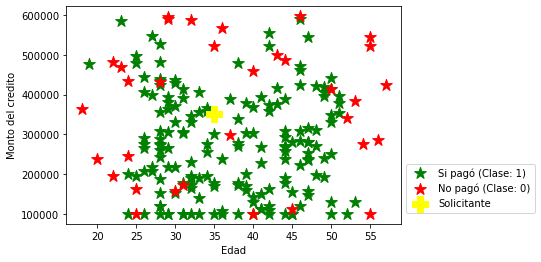

In [10]:
#edad=53
#monto=350000

#edad=60
#monto=350000

edad=35
monto=350000

#escalar datos del nuevo solicitante
solicitante=escalador.transform([[edad,monto]])

#calcular clase y probabilidades
print("Clase", clasificador.predict(solicitante))
print("Probilidades por clase", clasificador.predict_proba(solicitante))

#codigo de graficar
plt.scatter(pagadores["edad"],pagadores["credito"],
           marker="*", s=150, color="green",
           label="Si pagó (Clase: 1)")

plt.scatter(deudores["edad"],deudores["credito"],
           marker="*", s=150, color="red",
           label="No pagó (Clase: 0)")

plt.scatter(edad,monto, marker="P", s=250, color="yellow",
            label="Solicitante"
           )
plt.ylabel("Monto del credito")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1,0.3))
plt.show()


<BR><BR>

# Regiones de las clases
### Pagadores vs Deudores

Para redimensionar los vectores es la función reshape.   
Python reshape de la librería numpy.   
Con esta función podemos darle un nuevo tamaño a un arreglo, es decir, redimensionar un arreglo en cuanto a filas y columnas se refiere.

Podemos escribir un -1 y enviará un arreglo 1D con todos los elementos del arreglo.

https://appgametutoriales.com/python-reshape-array-numpy-redimensionar-de-un-arreglo/#:~:text=En%20este%20tutorial%20explicamos%20el,y%203%20columnas%20por%20ejemplo.

Registros generados = 43*501

In [11]:
#Crear datos sinteticos con Numpy
creditos = np.array([np.arange(100000,600010,1000)]*43).reshape(1,-1)
edades = np.array([np.arange(18,61)]*501).reshape(1,-1)

In [24]:
#Mostramos los creditos
creditos.shape

(1, 21543)

In [26]:
edades.shape

(1, 21543)

In [13]:
#Mostramos las edades
edades

array([[18, 19, 20, ..., 58, 59, 60]])

In [ ]:
creditos.shape

En Python, el método stack() se usa para combinar una secuencia de matrices numpy junto con un eje dado.

In [14]:
#vamos a crear un data frame para ello vamos a convinar la matrice edades y creditos
todos=pd.DataFrame(np.stack((edades,creditos),axis=2)[0], columns=["edad","credito"])


In [15]:
#obtener información del tipo de dato de la columnas
todos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21543 entries, 0 to 21542
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   edad     21543 non-null  int32
 1   credito  21543 non-null  int32
dtypes: int32(2)
memory usage: 168.4 KB


In [16]:
#mostramos los registros
todos.head(10)

,edad,credito
0,18,100000
1,19,101000
2,20,102000
3,21,103000
4,22,104000
5,23,105000
6,24,106000
7,25,107000
8,26,108000
9,27,109000


In [17]:
#ver las dimenciones
creditos.shape

(1, 21543)

In [21]:
#Escalar los datos
solicitantes = escalador.transform(todos)

In [22]:
#Predecir todas las clases
clases_resultantes = clasificador.predict(solicitantes)

In [27]:
clases_resultantes

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

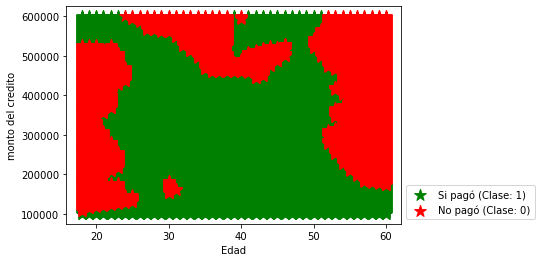

In [28]:
#Filtramos los pagadores de los deudores
pagadores = todos[clases_resultantes==1]
deudores = todos[clases_resultantes==0]
#Código para graficar
plt.scatter(pagadores["edad"],pagadores["credito"],
           marker="*", s=150, color="green",
           label="Si pagó (Clase: 1)")

plt.scatter(deudores["edad"],deudores["credito"],
           marker="*", s=150, color="red",
           label="No pagó (Clase: 0)")
plt.ylabel("monto del credito")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1,0.2))
plt.show()

### Conclusiones

Con este mapa un banco podria tomar desiciones de que reglas de negocio aplicar para prestar un credito

Ventajas de KNN
Se puede explicar al area de negocio y es muy sencillo de entender.

muy practico se utiliza para clasificar, predecir y para cubrir los valores faltantes.

Devantajas:
Se deben de escalar los datos para que nos de resultados correctos.

La distribución de los datos no es importante, pero si la escalación si importa.

Cuando tenemos multiples columnas su rendimiento si decrece.